In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [2]:
encoder_input = tf.keras.Input(shape = (28, 28, 1), name = 'img')
x = tf.keras.layers.Conv2D(16, 3, activation = 'relu')(encoder_input)
x = tf.keras.layers.Conv2D(32, 3, activation = 'relu')(x)
x = tf.keras.layers.MaxPooling2D(3)(x)
x = tf.keras.layers.Conv2D(32, 3, activation = 'relu')(x)
x = tf.keras.layers.Conv2D(16, 3, activation = 'relu')(x)
encoder_output = tf.keras.layers.GlobalMaxPooling2D()(x)


In [3]:
encoder = tf.keras.Model(encoder_input, encoder_output, name = 'encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          4624      
                                                           

In [4]:
x = tf.keras.layers.Reshape((4, 4, 1))(encoder_output)
x = tf.keras.layers.Conv2DTranspose(16, 3, activation = 'relu')(x)
x = tf.keras.layers.Conv2DTranspose(16, 3, activation = 'relu')(x)
x = tf.keras.layers.UpSampling2D(3)(x)
x = tf.keras.layers.Conv2DTranspose(16, 3, activation = 'relu')(x)

decoder_output = tf.keras.layers.Conv2DTranspose(1, 3, activation = 'relu')(x)

In [5]:
autoencoder = tf.keras.Model(encoder_input, decoder_output, name = 'autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          4624      
                                                       

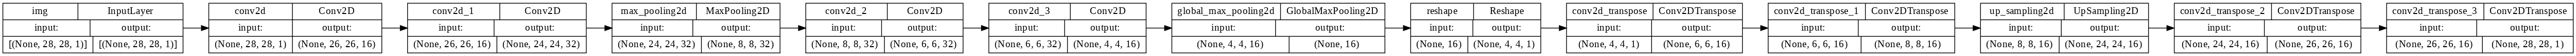

In [8]:
plot_model(autoencoder, to_file = './autoencoder.png', dpi =  100, rankdir = 'LR', show_shapes = True)